<a href="https://colab.research.google.com/github/Dhathri19/Prafulla-ma-am-s-project/blob/main/Copy_of_Copy_of_Mask_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Installation**

Update to Tensorflow 2.5

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: ignored

In [ ]:
# Update CUDA for TF 2.5
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
# Check if package has been installed
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
# Upgrade Tensorflow
!pip install --upgrade tensorflow==2.5.0

Install Mask R-CNN

In [ ]:
!wget https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
!unzip maskrcnn_colab_demo_commit_17.zip
import sys
sys.path.append("/content/maskrcnn_colab/mrcnn_demo")
from m_rcnn import *
%matplotlib inline

In [ ]:
!nvidia-smi

## **2. Image Dataset**

Load your annotated dataset


In [ ]:
%ls

gdrive/                                  maskrcnn_colab_demo_commit_17.zip
libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb  sample_data/
maskrcnn_colab/


In [ ]:
cd /content/gdrive

/content/gdrive


In [ ]:
ls

MyDrive/


In [ ]:
cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
ls

 annotations.json  'Colab Notebooks'/   dataset.zip


In [ ]:
!unzip /content/dataset.zip -d .

unzip:  cannot find or open /content/dataset.zip, /content/dataset.zip.zip or /content/dataset.zip.ZIP.


In [ ]:
# Extract Images
images_path = "/content/gdrive/MyDrive/dataset.zip"
annotations_path = "/content/gdrive/MyDrive/annotations.json"

extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 1239 images


In [ ]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/gdrive/MyDrive/annotations.json
Annotation json path:  /content/gdrive/MyDrive/annotations.json
Train: 1102
Validation: 137
Classes: 1


In [ ]:
# Load image samples
dataset_train = '/content/dataset'
display_image_samples(dataset_train)

AttributeError: ignored

##**3. Training**

Train Mask RCNN on your custom Dataset.

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
# config.display()
model = load_training_model(config)

/content/maskrcnn_colab/mask_rcnn_coco.h5


OSError: ignored

In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/maskrcnn_colab/logs/object20221028T0511/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_mask_deconv  

## **4. Detection (test your model on a random image)**

In [ ]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)

Instructions for updating:
Use fn_output_signature instead


Loading weights from  /content/maskrcnn_colab/logs/object20221028T0511/mask_rcnn_object_0005.h5
Re-starting from epoch 5


original_image           shape: (512, 512, 3)         min:   65.00000  max:  180.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:   65.00000  max:  180.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min:  -58.70000  max:   75.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


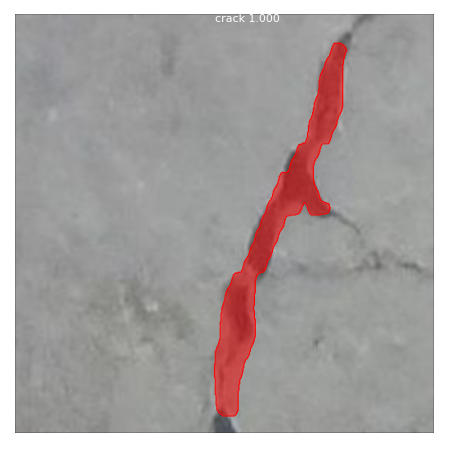

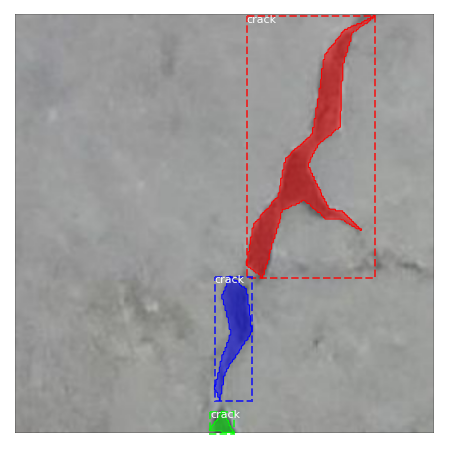

In [ ]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)